In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [182]:
data = pd.read_csv("intelligent_classroom_categorical_dataset.csv")

In [184]:
data

,student_id,age,engagement_level,task_type,task_difficulty,time_spent_on_task,accuracy_of_responses,emotion_score,frustration_level,skill_gap,personalized_feedback,optimized_learning_path,learning_progress,progress_category
0,1,16,8.28,Speaking,Hard,224,54,0.77,3,Vocabulary,Improve pronunciation.,Listening → Speaking → Writing,23.41,Low
1,1,13,7.65,Speaking,Easy,472,76,-0.54,0,Pronunciation,Practice grammar rules.,Writing → Reading → Listening,31.58,Low
2,1,14,5.74,Writing,Easy,332,53,0.41,6,Grammar,Improve pronunciation.,Writing → Reading → Listening,24.91,Low
3,1,16,9.56,Grammar,Medium,77,96,-0.21,9,Grammar,Practice grammar rules.,Writing → Reading → Listening,41.41,Medium
4,1,12,2.00,Reading,Medium,150,62,-0.76,1,Grammar,Improve pronunciation.,Listening → Speaking → Writing,25.39,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,500,14,0.78,Writing,Easy,473,95,-0.73,5,Vocabulary,Good progress.,Reading → Grammar → Speaking,36.16,Low
4996,500,15,0.73,Reading,Medium,312,93,0.05,6,Grammar,Practice grammar rules.,Writing → Reading → Listening,40.83,Medium
4997,500,12,8.50,Writing,Easy,31,67,0.36,0,Vocabulary,Focus on synonyms.,Reading → Grammar → Speaking,31.96,Low
4998,500,11,2.13,Writing,Easy,103,61,-0.09,5,Pronunciation,Focus on synonyms.,Listening → Speaking → Writing,21.79,Low


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   student_id               5000 non-null   int64  
 1   age                      5000 non-null   int64  
 2   engagement_level         5000 non-null   float64
 3   task_type                5000 non-null   object 
 4   task_difficulty          5000 non-null   object 
 5   time_spent_on_task       5000 non-null   int64  
 6   accuracy_of_responses    5000 non-null   int64  
 7   emotion_score            5000 non-null   float64
 8   frustration_level        5000 non-null   int64  
 9   skill_gap                3734 non-null   object 
 10  personalized_feedback    5000 non-null   object 
 11  optimized_learning_path  5000 non-null   object 
 12  learning_progress        5000 non-null   float64
 13  progress_category        5000 non-null   object 
dtypes: float64(3), int64(5),

In [188]:
data.describe()

,student_id,age,engagement_level,time_spent_on_task,accuracy_of_responses,emotion_score,frustration_level,learning_progress
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,250.500000,13.468400,4.942076,314.99840,74.648600,0.009420,5.112800,31.857064
std,144.351715,2.276673,2.880519,165.75942,14.552233,0.579803,3.141409,7.688118
min,1.000000,10.000000,0.000000,30.00000,50.000000,-1.000000,0.000000,8.430000
25%,125.750000,11.000000,2.457500,171.00000,62.000000,-0.490000,2.000000,26.140000
50%,250.500000,13.000000,4.880000,315.00000,74.000000,0.020000,5.000000,31.805000
75%,375.250000,15.000000,7.420000,459.00000,87.000000,0.510000,8.000000,37.410000
max,500.000000,17.000000,10.000000,599.00000,100.000000,1.000000,10.000000,54.830000


Text(0.5, 1.0, 'Outliers in engagement_level')

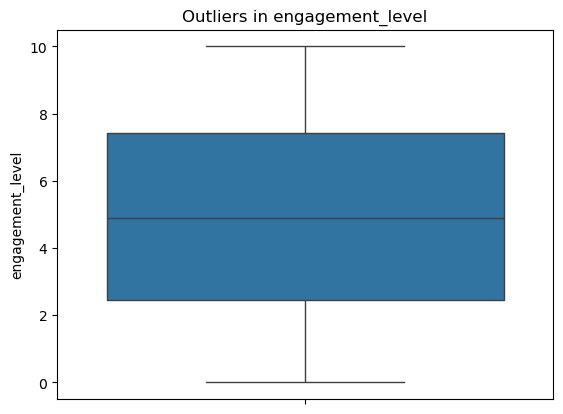

In [190]:
sns.boxplot(y=data["engagement_level"])
plt.title("Outliers in engagement_level")

In [192]:
data.isnull().sum()

student_id                    0
age                           0
engagement_level              0
task_type                     0
task_difficulty               0
time_spent_on_task            0
accuracy_of_responses         0
emotion_score                 0
frustration_level             0
skill_gap                  1266
personalized_feedback         0
optimized_learning_path       0
learning_progress             0
progress_category             0
dtype: int64

In [194]:
data_1 =pd.DataFrame({
    'task_difficulty':['Easy','Medium','Hard']
})
def task(value):
    if value == 'Easy':
        return 0
    elif value =='Medium':
        return 1
    elif value == 'Hard':
        return 2
    else: 
        return none
data_1['Dificultate_float'] = data['task_difficulty'].apply(task)
print(data_1)


  task_difficulty  Dificultate_float
0            Easy                  2
1          Medium                  0
2            Hard                  0


In [196]:
x = data_1.drop('task_difficulty', axis =1)
y = data_1['task_difficulty']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=62)

In [198]:
y_test

1    Medium
Name: task_difficulty, dtype: object

In [200]:
model = LinearRegression()

In [208]:
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'Easy'

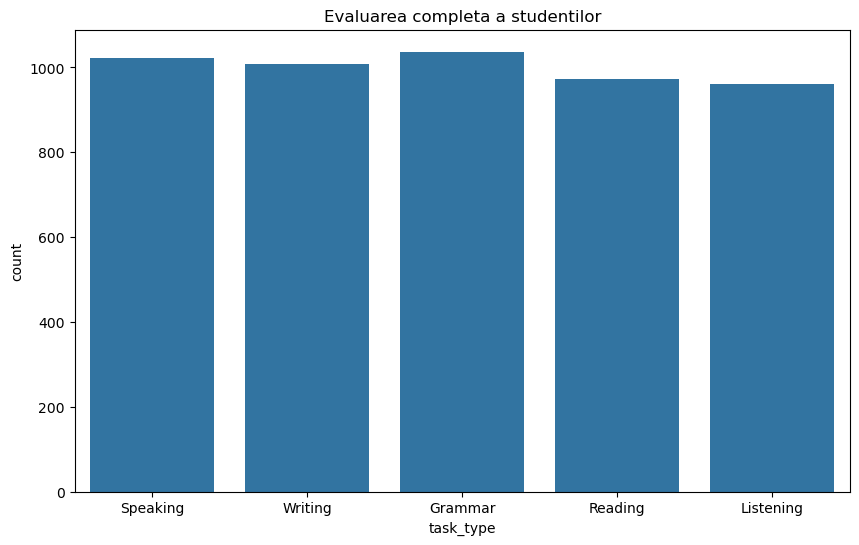

In [212]:

plt.figure(figsize =(10,6))
sns.countplot(x="task_type",data=data )
plt.title('Evaluarea completa a studentilor')
plt.show()